# Lead Scoring Assignment

# Problem Statement

An X Education (online Education company) needs help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chances & lower lead score have lower conversion chances. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

### Listing the steps to perform the analysis:
    1. Importing Data
    2. Understanding Data
    3. Missing Value treatment
    4. Data Correction
    5. Univariate Analysis
    6. Multivariate Analysis
    7. Outliers Treatment
    8. Creating Dummy Vairables
    9. Train - Test Split
    10. Feature Scaling
    11. Model Building
    12. Feature Selection - RFE
    13. ROC curve
    14. Finding the cut-off
    15. Precision & Recall
    16. Prediction on Test set
    17. Assigning Lead Score to Dataset

In [1]:
#importing libraries & suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Styling the plot
style.use('ggplot')
sns.set_style('whitegrid')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# 1. Importing Dataset

In [2]:
#Importing Data
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Understanding Data

In [3]:
# shape
leads.shape

(9240, 37)

In [4]:
#info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Checking duplicates for Prospect ID
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [6]:
#Checking duplicates for Lead Number
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

##### No duplicates found. Hence can be removed.

In [7]:
# Using this for Lead Score at the end of the notebook
Lead_Number = leads['Lead Number']

In [8]:
# Droppping these columns as we don't fit these in the model
cols_to_drop = ['Prospect ID', 'Lead Number']

# 3. Missing Value treatment

In [9]:
# There is select instead of Nan for replacing
leads = leads.replace('Select', np.nan)

In [10]:
# Missing Values %age
round((leads.isnull().sum()/len(leads)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# Removing the missing values with more than 40%
for i in leads.columns:
    if((100*leads[i].isnull().sum()/len(leads.index)) >= 40):
        leads.drop(i, axis = 1, inplace = True)

In [12]:
# Missing Value Percentages for remaining variables
round((leads.isnull().sum()/len(leads)*100), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Checking if there are columns with one unique value since it won't affect our analysis
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [14]:
#Dropping uniques
cols_to_drop.extend(('Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'))


# 4. Data Correction

### Analyzing Variables

In [15]:
# Checking City
round(leads['City'].value_counts(dropna = False)*100/len(leads),2)


NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [16]:
#Dropping City as 75% records are Mumbai or Nan
cols_to_drop.append('City')


In [17]:
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Magazine',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'City']

In [18]:
# Checking Country
round(leads['Country'].value_counts(dropna = False)*100/len(leads),2)


India                   70.26
NaN                     26.63
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Bahrain                  0.08
Hong Kong                0.08
Oman                     0.06
France                   0.06
unknown                  0.05
Kuwait                   0.04
South Africa             0.04
Canada                   0.04
Nigeria                  0.04
Germany                  0.04
Sweden                   0.03
Philippines              0.02
Uganda                   0.02
Italy                    0.02
Bangladesh               0.02
Netherlands              0.02
Asia/Pacific Region      0.02
China                    0.02
Belgium                  0.02
Ghana                    0.02
Kenya                    0.01
Sri Lanka                0.01
Tanzania                 0.01
Malaysia                 0.01
Liberia   

In [19]:
#Dropping Country as 97% records are India or Nan
cols_to_drop.append('Country')

In [20]:
# Checking Specialization
round(leads['Specialization'].value_counts(dropna = False)*100/len(leads),2)


NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [21]:
#Making NA -> Not Specified
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')
# Grouping values with low count in order to remove bias
# Management Specialization
leads['Specialization'] = leads['Specialization'].replace(['Finance Management', 'Human Resource Management',
                                                          'Marketing Management', 'Operations Management',
                                                          'IT Projects Management', 'Supply Chain Management',
                                                          'Healthcare Management', 'Hospitality Management',
                                                          'Retail Management'], 'Management Specializations')
# Business Specialization
leads['Specialization'] = leads['Specialization'].replace(['International Business', 'Rural and Agribusiness',
                                                          'E-Business'], 'Business Specializations')

In [22]:
# Checking Tags
round(leads['Tags'].value_counts(dropna = False)*100/len(leads),2)

NaN                                                  36.29
Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.

In [23]:
# Grouping values with low count remove bias
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')
leads['Tags'] = leads['Tags'].replace(['Recognition issue (DEC approval)', 'Shall take in the next coming month', 
                                      'University not recognized', 'Lateral student',
                                       'In confusion whether part time or DLP', 'Interested in Next batch, Still Thinking',
                                       'Want to take admission but has financial problems', 'Lost to Others',
                                      'in touch with EINS', 'number not provided', 'opp hangup', 'wrong number given',
                                      'Diploma holder (Not Eligible)', 'invalid number', 'Graduation in progress',
                                      'Interested  in full time MBA', 'Not doing further education', 'Lost to EINS', 'Busy',
                                      'switched off'], 'Other Tags')

In [24]:
# Checking 'What matters most to you in choosing a course'
round(leads['What matters most to you in choosing a course'].value_counts(dropna = False)*100/len(leads),2)

Better Career Prospects      70.65
NaN                          29.32
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [25]:
# Dropping 'What matters most to you in choosing a course' as 99% are Nulls or Better Career Prospects
cols_to_drop.append('What matters most to you in choosing a course')


In [26]:
# Checking 'What is your current occupation'
round(leads['What is your current occupation'].value_counts(dropna = False)*100/len(leads),2)

Unemployed              60.61
NaN                     29.11
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [27]:
# Grouping values with low count in order to remove bias
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Not Specified')
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Housewife', 'Businessman'], 'Other')


In [28]:
# Checking Lead Source
round(leads['Lead Source'].value_counts(dropna = False)*100/len(leads),2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
NaN                   0.39
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [29]:
# Replacing the NULL Values in 'Lead Source' with Google and grouping values with low count to remove bias
leads['Lead Source'] = leads['Lead Source'].replace([np.nan, 'google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Referral Sites', 'Facebook', 'bing', 'google', 'Click2call',
                                                     'Live Chat', 'Social Media', 'Press_Release', 'testone',
                                                     'Pay per Click Ads', 'WeLearn', 'blog', 'welearnblog_Home',
                                                     'NC_EDM', 'youtubechannel'], 'Others')

In [30]:
# Checking Last Activity
leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
# Replacing the NA values and other less occuring entries as Others
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')
leads['Last Activity'] = leads['Last Activity'].replace(['Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Email Marked Spam', 'Email Received',
                                                         'View in browser link Clicked', 'Approached upfront',
                                                         'Had a Phone Conversation', 'Unsubscribed', 'Unreachable'],
                                                        'Other Methods')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation',
                                                        'View in browser link Clicked', 'Approached upfront',
                                                        'Visited Booth in Tradeshow', 'Resubscribed to emails',
                                                        'Form Submitted on Website'], 'Other Methods')

In [32]:
# Grouping values with low count in order to remove bias
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced', 'Email Link Clicked',
                                                                         'Unreachable', 'Had a Phone Conversation',
                                                                        'Olark Chat Conversation', 'Approached upfront',
                                                                        'Resubscribed to emails', 'Unsubscribed',
                                                                         'View in browser link Clicked',
                                                                        'Form Submitted on Website', 'Email Received',
                                                                         'Email Marked Spam'], 'Others')


In [33]:
#Numeric values
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [34]:
# Mean & Meadian are 3.45 & 3 respectively. Imputing mean to null.
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [35]:
# Imputing 0 to null, since it is safe and has a logically same meaning.
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].min())


In [36]:
# Checking 'Do Not Call'
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [37]:
# Checking Search
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [38]:
# Checking Magazine
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [39]:
# Checking 'Newspaper Article'
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [40]:
# Checking 'Receive More Updates About Our Courses'
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [41]:
# Checking 'X Education Forums'
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [42]:
# Checking Newspaper
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [43]:
# Checking 'Digital Advertisement'
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [44]:
# Checking 'Through Recommendations'
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [45]:
# Checking 'Receive More Updates About Our Courses'
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [46]:
# Checking 'Update me on Supply Chain Content'
leads['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [47]:
# Checking 'Get updates on DM Content'
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [48]:
# Checking 'I agree to pay the amount through cheque'
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [49]:
# Adding the redundant columns to cols_to_drop in order to drop them
cols_to_drop.extend(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
                     'Receive More Updates About Our Courses', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                     'Through Recommendations', 'Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content', 'Get updates on DM Content',
                     'I agree to pay the amount through cheque','Last Notable Activity'])

In [50]:
cols_to_drop

['Prospect ID',
 'Lead Number',
 'Magazine',
 'Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'City',
 'Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'Receive More Updates About Our Courses',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Last Notable Activity']

In [51]:
# Dropping the Variables
leads_final = leads.drop(cols_to_drop, axis = 1)

In [52]:
# Checking the info again
leads_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

# 5. Univariate Analysis

### Categorical Variables

In [53]:
# Creating fucntion to generate countplot
def fnc_Cntplt(var_in):
    plt.figure(figsize=(15, 5))
    fig = sns.countplot(x = var_in, hue = leads_final.Converted, data=leads_final, #palette=['#432371',"#FAAE7B"]
                       palette=sns.color_palette("pastel"))
    
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        fig.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
    
    plt.xticks(rotation = 90)
    plt.show()

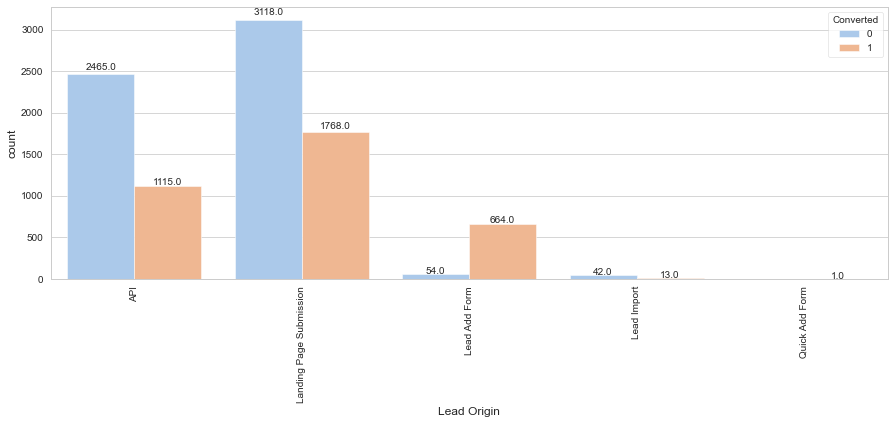

In [54]:
fnc_Cntplt('Lead Origin')

##### Inference: 
    Customers identified via Lead Add Form have a high conversion of 664.

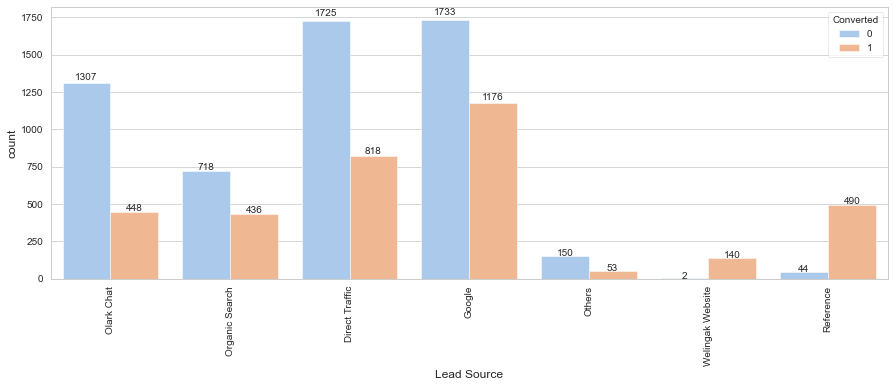

In [55]:
fnc_Cntplt('Lead Source')

##### Inference:
    1. Leads via Google & Direct Traffic convert less as compared to others.
    2. Leads coming via Reference have the highest conversion rate.

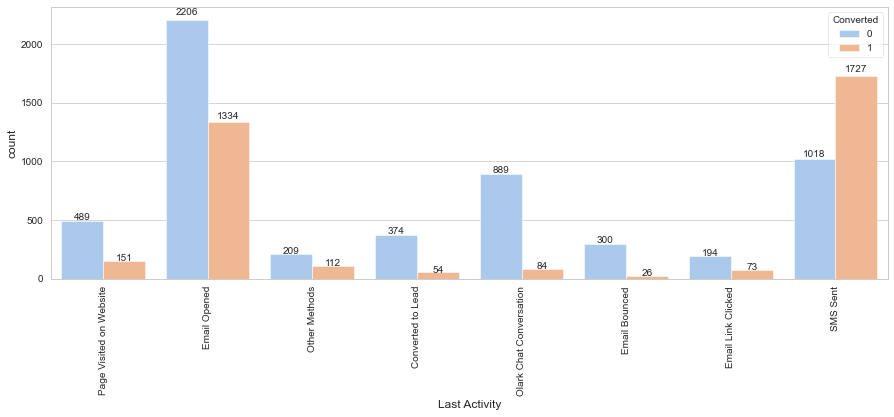

In [56]:
fnc_Cntplt('Last Activity')

##### Inference:
    Customers with last activity as SMS sent have a conversion of 1727.

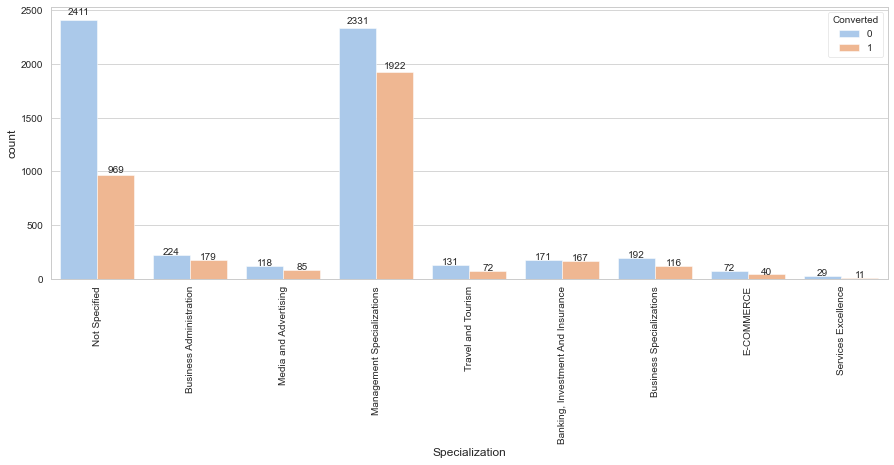

In [57]:
fnc_Cntplt('Specialization')

##### Inference:
    1. Management Specialization have most conversion of 1922.
    2. Services Excellence has least conversion 29.

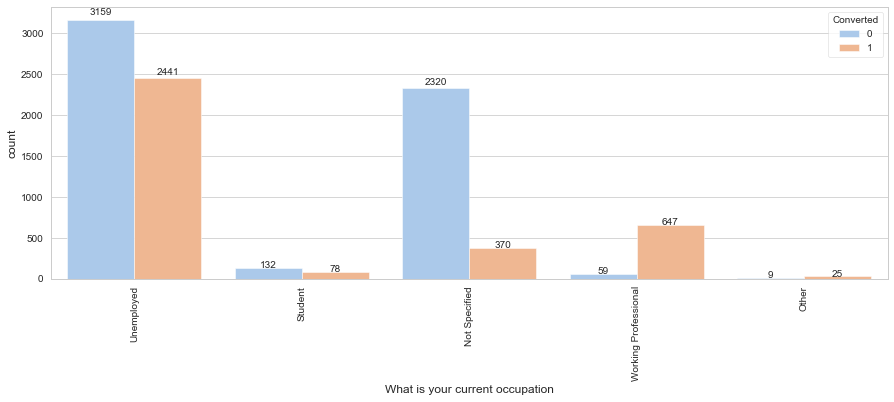

In [58]:
fnc_Cntplt('What is your current occupation')

##### Inference:
    1. Out of 5600 unemployed only 2441 converted.
    2. While out of 706 Working Professionals, 647 converted.

In [59]:
# Checking the Percentages of Converted Values
sum(leads_final['Converted'])/len(leads_final['Converted'])*100

38.53896103896104

##### Inference: 
    There are 38.5% Converted Leads

# 6. Multivariate Analysis

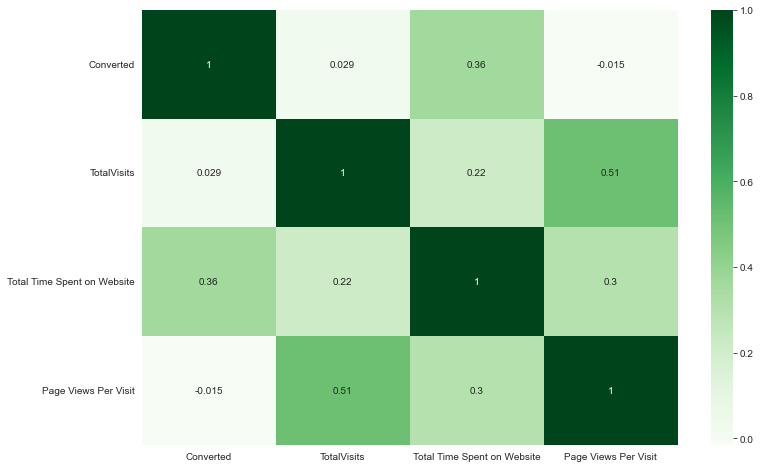

In [60]:
# Checking the Numberical columns for Corelation
plt.figure(figsize = (12,8))
sns.heatmap(leads_final.corr(), annot = True, cmap= 'Greens')
plt.show()

# 7. Outliers Treatment

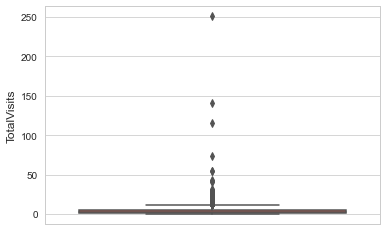

In [61]:
# Checking TotalVisits
sns.boxplot(y= leads_final['TotalVisits'])
plt.show()

In [62]:
leads_final['TotalVisits'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

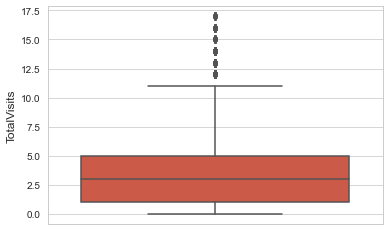

In [63]:
# Removing the top 1% of the value to handle outliers
leads_final = leads_final[(leads_final['TotalVisits'] <= leads_final['TotalVisits'].quantile(0.99))]
sns.boxplot(y = leads_final['TotalVisits'])
plt.show()

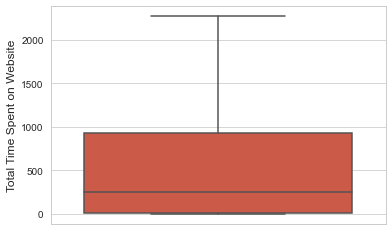

In [64]:
# Checking 'Total Time Spent on Website'
sns.boxplot(y = leads_final['Total Time Spent on Website'])
plt.show()

In [65]:
# Checking 'Page Views Per Visit'
leads_final['Page Views Per Visit'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.302302
std         2.066450
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

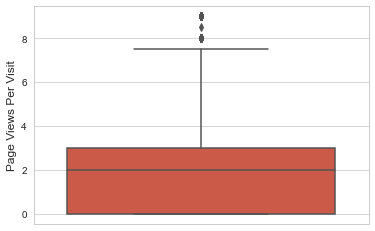

In [66]:
# Removing the top 1% of the values to handle the outliers
leads_final = leads_final[(leads_final['Page Views Per Visit'] <= leads_final['Page Views Per Visit'].quantile(0.99))]
sns.boxplot(y = leads_final['Page Views Per Visit'])
plt.show()

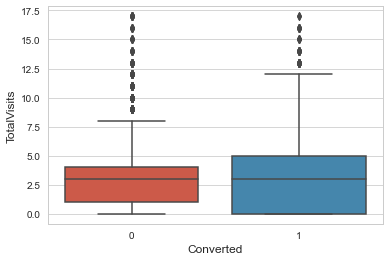

In [67]:
# Checking 'TotalVisits' vs 'Converted'
sns.boxplot(x = leads_final['Converted'], y = leads_final['TotalVisits'])
plt.show()

##### Inference: 
    Median of both Converted and Not Converted for 'TotalVisits' is almost same.

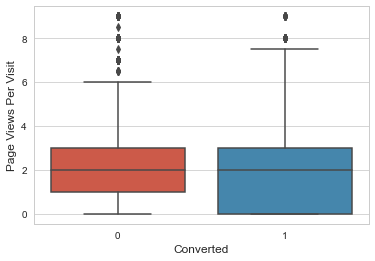

In [68]:
# Checking 'Page Views Per Visit' vs 'Converted'
sns.boxplot(x = leads_final['Converted'], y = leads_final['Page Views Per Visit'])
plt.show()

##### Inference: 
    Median of both Converted and Not Converted for 'Page Views Per Visit' is almost same.

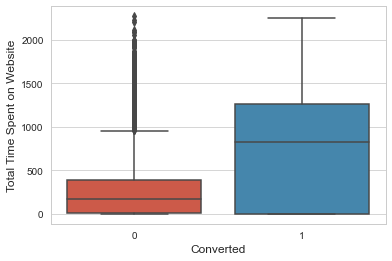

In [69]:
# Checking 'Total Time Spent on Website' vs 'Converted'
sns.boxplot(x = leads_final['Converted'], y = leads_final['Total Time Spent on Website'])
plt.show()

##### Inference: 
    Leads spending more time on the website tend to get converted.

In [70]:
# Function to Convert Yes/No into 1/0 to fit the model (binary mapping)
def binary_map(x):
    return x.map({'Yes': 1, 'No':0})

varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

# Applying the above custom function

leads_final[varlist] = leads_final[varlist].apply(binary_map)

In [71]:
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Methods,Media and Advertising,Unemployed,Ringing,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,0


# 8. Creating Dummy Vairables

In [72]:
cat_cols = leads_final.select_dtypes(include = 'object').columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags'],
      dtype='object')

In [73]:
# Lead Origin
Lead_Origin = pd.get_dummies(leads_final['Lead Origin'], prefix = 'Lead_Origin')
Lead_Origin = Lead_Origin.drop('Lead_Origin_Quick Add Form', axis = 1)
leads_final = pd.concat([leads_final, Lead_Origin], axis = 1)

In [74]:
# Lead Source
Lead_Source = pd.get_dummies(leads_final['Lead Source'], prefix = 'Lead_Source')
Lead_Source = Lead_Source.drop('Lead_Source_Others', axis = 1)
leads_final = pd.concat([leads_final, Lead_Source], axis = 1)

In [75]:
# Last Activity
Last_Activity = pd.get_dummies(leads_final['Last Activity'], prefix = 'Last_Activity')
Last_Activity = Last_Activity.drop('Last_Activity_Other Methods', axis = 1)
leads_final = pd.concat([leads_final, Last_Activity], axis = 1)

In [76]:
# Specialization
Special = pd.get_dummies(leads_final['Specialization'], prefix = 'Specialization')
Special = Special.drop('Specialization_Not Specified', axis = 1)
leads_final = pd.concat([leads_final, Special], axis = 1)

In [77]:
# What is your current occupation
occup = pd.get_dummies(leads_final['What is your current occupation'], prefix = 'Occupation')
occup = occup.drop('Occupation_Other', axis = 1)
leads_final = pd.concat([leads_final, occup], axis = 1)

In [78]:
# Tags
tags = pd.get_dummies(leads_final['Tags'], prefix = 'Tags')
tags = tags.drop('Tags_Not Specified', axis = 1)
leads_final = pd.concat([leads_final, tags], axis = 1)

In [79]:
leads_final.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,...,1,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,...,1,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other Methods,Media and Advertising,Unemployed,...,1,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,...,1,0,0,0,0,0,0,0,0,1


#### Dropping Repeated Variables

In [80]:
leads_final = leads_final.drop(cat_cols, axis = 1)

In [81]:
leads_final.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


# 9. Train - Test Split

In [82]:
y = leads_final['Converted']
X = leads_final.drop('Converted', axis = 1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 100)

In [84]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
302,0,7.0,250,2.33,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,1,0.0,0,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,5.0,470,5.00,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7656,1,6.0,352,6.00,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3241,0,4.0,973,1.33,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


# 10. Feature Scaling

In [85]:
# Scaling the Numerical variables
scaler = StandardScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
302,0,1.336782,-0.428736,0.059262,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.178546,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1033,0,0.642022,-0.025151,1.477695,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7656,1,0.989402,-0.241619,2.008943,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3241,0,0.294642,0.897591,-0.471986,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


# 11 . Model Building

In [86]:
# Model 1: Model building using statsmodels
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1435.0
Date:                Tue, 24 Jan 2023   Deviance:                       2870.0
Time:                        02:09:04   Pearson chi2:                 7.51e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               20.4724   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Do Not Email                                        -1.1370      0.256     -4.450      0.000      -1.638      -0.636
TotalVisits                                          0.2529      0.073      3.467      0.001       0.110       0.396
Total Time Spent on Website                          1.0770      0.057     19.054      0.000       0.966       1.188
Page Views Per Visit                                -0.2846      0.085     -3.364      0.001      -0.450      -0.119
A free copy of Mastering The Interview              -0.0592      0.157     -0.377      0.706      -0.367       0.249
Lead_Origin_API                                    -20.0957   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead_Origin_Landing Page Submission                -20.3183   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead_Origin_Lead Add Form                          -17.5442   2.92e+04     -0.001      1.000   -5.73e+04    5.73e+04
Lead_Origin_Lead Import                            -21.1126   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Lead_Source_Direct Traffic                          -0.1760      0.422     -0.417      0.677      -1.004       0.652
Lead_Source_Google                                  -0.2072      0.405     -0.511      0.609      -1.001       0.587
Lead_Source_Olark Chat                               0.7438      0.426      1.746      0.081      -0.091       1.579
Lead_Source_Organic Search                          -0.5537      0.422     -1.313      0.189      -1.380       0.273
Lead_Source_Reference                               -1.6617      1.081     -1.537      0.124      -3.781       0.458
Lead_Source_Welingak Website                         2.4129      1.450      1.664      0.096      -0.429       5.255
Last_Activity_Converted to Lead                     -0.8240      0.388     -2.126      0.033      -1.584      -0.064
Last_Activity_Email Bounced                         -1.4464      0.566     -2.556      0.011      -2.556      -0.337
Last_Activity_Email Link Clicked                    -0.3773      0.403     -0.937      0.349      -1.167       0.412
Last_Activity_Email Opened                           0.0520      0.284      0.183      0.855      -0.504       0.608
Last_Activity_Olark Chat Conversation               -1.2638      0.342     -3.695      0.000      -1.934      -0.593
Last_Activity_Page Visited on Website               -0.6448      0.345     -1.870      0.062      -1.321       0.031
Last_Activity_SMS Sent                               1.4787      0.283      5.234      0.000       0.925       2.032
Specialization_Banking, Investment And In

# 12. Feature Selection - RFE

In [87]:
# Logistic Regression
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [88]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead_Origin_API', False, 5),
 ('Lead_Origin_Landing Page Submission', False, 4),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 3),
 ('Lead_Source_Direct Traffic', False, 14),
 ('Lead_Source_Google', False, 15),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', False, 9),
 ('Lead_Source_Reference', True, 1),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Converted to Lead', True, 1),
 ('Last_Activity_Email Bounced', True, 1),
 ('Last_Activity_Email Link Clicked', False, 10),
 ('Last_Activity_Email Opened', False, 13),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Page Visited on Website', False, 2),
 ('Last_Activity_SMS Sent', True, 1),
 ('Specialization_Banking, Investment And Insurance', False, 16),
 ('S

In [89]:
# Selected Variables
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Lead_Source_Reference', 'Lead_Source_Welingak Website',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Occupation_Not Specified',
       'Occupation_Working Professional', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Tags', 'Tags_Ringing', 'Tags_Still Thinking',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [90]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead_Origin_API',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_Direct Traffic', 'Lead_Source_Google',
       'Lead_Source_Organic Search', 'Last_Activity_Email Link Clicked',
       'Last_Activity_Email Opened', 'Last_Activity_Page Visited on Website',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Business Specializations', 'Specialization_E-COMMERCE',
       'Specialization_Management Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence', 'Occupation_Student',
       'Occupation_Unemployed', 'Tags_Interested in Next batch'],
      dtype='object')

In [91]:
# Model 2 using statsmodels

X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1454.0
Date:                Tue, 24 Jan 2023   Deviance:                       2907.9
Time:                        02:09:06   Pearson chi2:                 7.38e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5822
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4710      0.134     -3.503      0.000      -0.735      -0.207
Do Not Email                                -1.1920      0.245     -4.869      0.000      -1.672      -0.712
Total Time Spent on Website                  1.0823      0.055     19.639      0.000       0.974       1.190
Lead_Origin_Lead Add Form                    2.9400      0.962      3.055      0.002       1.054       4.826
Lead_Source_Olark Chat                       1.2260      0.143      8.580      0.000       0.946       1.506
Lead_Source_Reference                       -1.4323      1.012     -1.415      0.157      -3.416       0.551
Lead_Source_Welingak Website                 2.4983      1.402      1.781      0.075      -0.250       5.247
Last_Activity_Converted to Lead             -0.7594      0.278     -2.731      0.006      -1.304      -0.214
Last_Activity_Email Bounced                 -1.3584      0.497     -2.732      0.006      -2.333      -0.384
Last_Activity_Olark Chat Conversation       -1.1761      0.208     -5.654      0.000      -1.584      -0.768
Last_Activity_SMS Sent                       1.4768      0.108     13.703      0.000       1.266       1.688
Specialization_Travel and Tourism           -1.0833      0.378     -2.868      0.004      -1.824      -0.343
Occupation_Not Specified                    -1.9184      0.139    -13.808      0.000      -2.191      -1.646
Occupation_Working Professional              0.6178      0.290      2.130      0.033       0.049       1.186
Tags_Already a student                      -4.4856      0.605     -7.416      0.000      -5.671      -3.300
Tags_Closed by Horizzon                      4.5336      0.742      6.113      0.000       3.080       5.987
Tags_Interested in other courses            -3.8723      0.423     -9.165      0.000      -4.700      -3.044
Tags_Other Tags                             -1.2665      0.150     -8.464      0.000      -1.560      -0.973
Tags_Ringing                                -4.1572      0.248    -16.777      0.000      -4.643      -3.672
Tags_Still Thinking                         -2.2238      1.271     -1.750      0.080      -4.714       0.266
Tags_Will revert after reading the email     2.7593      0.197     13.988      0.000       2.373       3.146
============================================================================================================
"""

In [92]:
# Dropping the variables with p-values greater than 0.05
col = col.drop(['Lead_Source_Reference', 'Lead_Source_Welingak Website'])
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead_Origin_Lead Add Form', 'Lead_Source_Olark Chat',
       'Last_Activity_Converted to Lead', 'Last_Activity_Email Bounced',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Occupation_Not Specified',
       'Occupation_Working Professional', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Tags', 'Tags_Ringing', 'Tags_Still Thinking',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [93]:
# Model 3 

X_train_sm = sm.add_constant(X_train[col])

logm3 = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1468.4
Date:                Tue, 24 Jan 2023   Deviance:                       2936.8
Time:                        02:09:06   Pearson chi2:                 8.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5803
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3737      0.132     -2.820      0.005      -0.633      -0.114
Do Not Email                                -1.1647      0.240     -4.858      0.000      -1.635      -0.695
Total Time Spent on Website                  1.0784      0.055     19.578      0.000       0.970       1.186
Lead_Origin_Lead Add Form                    2.6995      0.273      9.877      0.000       2.164       3.235
Lead_Source_Olark Chat                       1.1952      0.143      8.383      0.000       0.916       1.475
Last_Activity_Converted to Lead             -0.7562      0.276     -2.741      0.006      -1.297      -0.216
Last_Activity_Email Bounced                 -1.2827      0.484     -2.653      0.008      -2.230      -0.335
Last_Activity_Olark Chat Conversation       -1.1753      0.207     -5.668      0.000      -1.582      -0.769
Last_Activity_SMS Sent                       1.4720      0.107     13.723      0.000       1.262       1.682
Specialization_Travel and Tourism           -1.0635      0.374     -2.845      0.004      -1.796      -0.331
Occupation_Not Specified                    -2.0047      0.138    -14.537      0.000      -2.275      -1.734
Occupation_Working Professional              0.4884      0.287      1.700      0.089      -0.075       1.051
Tags_Already a student                      -4.5711      0.604     -7.564      0.000      -5.756      -3.387
Tags_Closed by Horizzon                      4.2341      0.742      5.706      0.000       2.780       5.688
Tags_Interested in other courses            -4.0077      0.421     -9.523      0.000      -4.833      -3.183
Tags_Other Tags                             -1.3663      0.148     -9.248      0.000      -1.656      -1.077
Tags_Ringing                                -4.3112      0.246    -17.539      0.000      -4.793      -3.829
Tags_Still Thinking                         -2.3224      1.271     -1.827      0.068      -4.814       0.170
Tags_Will revert after reading the email     2.6092      0.195     13.395      0.000       2.227       2.991
============================================================================================================
"""

In [94]:
# Checking VIFs
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Tags_Will revert after reading the email,1.81
0,Do Not Email,1.78
3,Lead_Source_Olark Chat,1.73
5,Last_Activity_Email Bounced,1.71
7,Last_Activity_SMS Sent,1.61
6,Last_Activity_Olark Chat Conversation,1.49
2,Lead_Origin_Lead Add Form,1.46
9,Occupation_Not Specified,1.43
1,Total Time Spent on Website,1.36
10,Occupation_Working Professional,1.33


In [95]:
# Predictions on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.05516093, 0.01007602, 0.40111853, ..., 0.41829572, 0.75188426,
       0.00289358])

In [96]:
# Creating the DataFrame with Actual Converted and Predicted Probabilities
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.055161,302
1,0,0.010076,6087
2,0,0.401119,1033
3,0,0.009583,7656
4,1,0.990765,3241


In [97]:
# Making a new column Predicted with values which has Probability greater than 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.055161,302,0
1,0,0.010076,6087,0
2,0,0.401119,1033,0
3,0,0.009583,7656,0
4,1,0.990765,3241,1


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted))

0.9104196133899104


In [99]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Predicted)
confusion

array([[3749,  186],
       [ 384, 2044]], dtype=int64)

In [100]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3749            186
    # Converted            384             2044  

##### Metrics beyond Simple Accuracy

In [101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [102]:
# Sensitivity
TP / float(TP+FN)

0.841845140032949

In [103]:
# Specificity
TN / float(TN+FP)

0.9527318932655654

In [104]:
# False postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04726810673443456


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9165919282511211


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9070892813936607


# 13. ROC curve

In [107]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve (actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)


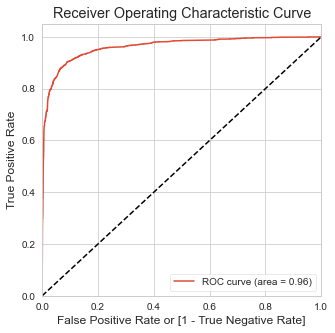

In [109]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# 14. Finding the cut-off

##### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity.

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.055161,302,0,1,0,0,0,0,0,0,0,0,0
1,0,0.010076,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.401119,1033,0,1,1,1,1,1,0,0,0,0,0
3,0,0.009583,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.990765,3241,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381581     1.000000     0.000000
0.1   0.1  0.801037     0.964168     0.700381
0.2   0.2  0.878359     0.934514     0.843710
0.3   0.3  0.900361     0.910626     0.894028
0.4   0.4  0.911834     0.880148     0.931385
0.5   0.5  0.910420     0.841845     0.952732
0.6   0.6  0.906333     0.815486     0.962389
0.7   0.7  0.903190     0.788715     0.973825
0.8   0.8  0.883545     0.725288     0.981194
0.9   0.9  0.866101     0.662273     0.991868


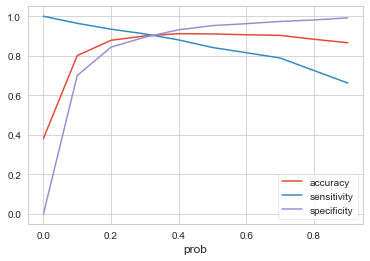

In [112]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

##### From the curve above, we can see that 0.3 is our Optimal Point

In [113]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.055161,302,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.010076,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.401119,1033,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.009583,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.990765,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted))

0.9003614647179004


In [115]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_true= y_train_pred_final.Converted, y_pred= y_train_pred_final.Final_Predicted)
confusion

array([[3518,  417],
       [ 217, 2211]], dtype=int64)

In [116]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        3518            417
    # Converted            217             2211  

##### Metrics beyond Simple Accuracy with 0.3 as Optimal Cutoff point

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Sensitivity
TP / float(TP+FN)

0.9106260296540363

In [119]:
# Specificity
TN / float(TN+FP)

0.8940279542566709

In [120]:
# False postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1059720457433291


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.841324200913242


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.94190093708166


# 15. Precision & Recall

In [123]:
# Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.841324200913242

In [124]:
# Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9106260296540363

##### Precision and Recall Tradeoff

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

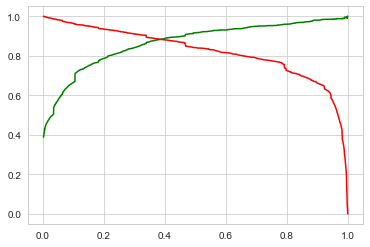

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# 16. Prediction on Test set

In [128]:
# Scaling the Numerical Variables
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [129]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
6906,0,1.919395,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1873,0,-0.546142,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
771,0,-0.797465,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4495,0,-0.623190,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9061,0,2.392690,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
# Predictions on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

6906    0.996913
1873    0.029359
771     0.003892
4495    0.004693
9061    0.237875
dtype: float64

In [132]:
# Converting y_pred to a DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6906,0.996913
1873,0.029359
771,0.003892
4495,0.004693
9061,0.237875


In [133]:
# Converting y_test to DataFrame
y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [135]:
# Removing index for both DataFrames to concatenate them side by side
y_pred_1.reset_index(drop= True, inplace= True)
y_test_df.reset_index(drop= True, inplace= True)

In [136]:
# Concatenating y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.996913
1,0,1873,0.029359
2,0,771,0.003892
3,0,4495,0.004693
4,1,9061,0.237875


In [137]:
# Renaming the column
y_pred_final = y_pred_final.rename(columns = {0: 'Converted_Prob'})

In [138]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID', 'Converted', 'Converted_Prob']]
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.996913
1,1873,0,0.029359
2,771,0,0.003892
3,4495,0,0.004693
4,9061,1,0.237875


In [139]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,6906,1,0.996913,1
1,1873,0,0.029359,0
2,771,0,0.003892,0
3,4495,0,0.004693,0
4,9061,1,0.237875,0


In [140]:
# Overall Accuracy
metrics.accuracy_score(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)

0.9130913091309131

In [141]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_true= y_pred_final.Converted, y_pred= y_pred_final.Final_Predicted)
confusion2

array([[1512,  148],
       [  89,  978]], dtype=int64)

In [156]:
# Actual/Predicted     Not_Converted    Converted
    # Not_Converted        1512            148
    # Converted            89             978  

In [142]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [143]:
# Sensitivity
TP / float(TP+FN)

0.9165885660731021

In [144]:
# Specificity
TN / float(TN+FP)

0.9108433734939759

In [145]:
# False postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0891566265060241


In [146]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8685612788632326


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9444097439100562


## Conclusions:
    Variables affecting the model the most are:
        - Tags_Already a student
        - Tags_Ringing
        - Tags_Closed by Horizzon
        - Tags_Interested in other courses
        - Lead_Origin_Lead Add Form
        - Tags_Will revert after reading the email

# 17. Assigning Lead Score to Dataset

In [148]:
leads_score = leads_final
leads_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,...,Occupation_Unemployed,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,0,0,0.0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,305,1.0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [149]:
# Scaling the numerical variables
leads_score[num_cols] = scaler.transform(leads_score[num_cols])

In [150]:
# Removing all the variables which were not in our final model
leads_score = leads_score[col]
leads_score = sm.add_constant(leads_score)
leads_score.head()

,const,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email
0,1.0,0,-0.887355,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0.349083,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,0,1.923064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,0,-0.327839,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.0,0,1.732278,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [151]:
# Making predictions
leads_score_pred = res.predict(leads_score)
leads_score_pred.head()

0    0.015625
1    0.013277
2    0.986736
3    0.006442
4    0.966019
dtype: float64

In [152]:
leads_score['Lead Score'] = round(leads_score_pred*100)
leads_score.head()

,const,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Travel and Tourism,Occupation_Not Specified,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Lead Score
0,1.0,0,-0.887355,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.0
1,1.0,0,0.349083,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
2,1.0,0,1.923064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,99.0
3,1.0,0,-0.327839,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
4,1.0,0,1.732278,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,97.0


In [153]:
# Adding Lead Number to see which Lead has scored how much
leads_score['Lead Number'] = Lead_Number
leads_score.head()

,const,Do Not Email,Total Time Spent on Website,Lead_Origin_Lead Add Form,Lead_Source_Olark Chat,Last_Activity_Converted to Lead,Last_Activity_Email Bounced,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Specialization_Travel and Tourism,...,Occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Still Thinking,Tags_Will revert after reading the email,Lead Score,Lead Number
0,1.0,0,-0.887355,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2.0,660737
1,1.0,0,0.349083,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,660728
2,1.0,0,1.923064,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,99.0,660727
3,1.0,0,-0.327839,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,660719
4,1.0,0,1.732278,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,97.0,660681


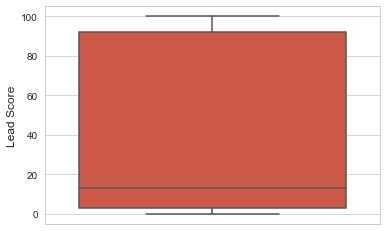

In [154]:
# Plotting Boxplot to check the distribution for the Lead Scores calculated
sns.boxplot(y = leads_score['Lead Score'])
plt.show()

# Conclusion

1. People who spend more time on the website or with more no. of visits convert more.
2. When the last activity was <b>SMS</b> or <b>Olark chat conversation</b> the conversion was more.
3. Working professsionals have a high chance of conversion.
4. While Referecene are the best form of leads there are significant conversions from Google, Direct Traffic, Organic search & Welingak website.
##### X Education are not converting enough of the Unemployed leads. They can probably come up with a strategy to tap on this segment. 
